# Online Shoppers Purchasing Intention Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv("../Desktop/online_shoppers_intention.csv")

## Data description

#### Online Shoppers Purchasing Intention Dataset Data Set 

Source link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

#### Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. 


The 'Revenue' attribute can be used as the class label. 

* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration":

    represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 


* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

    "Bounce Rate" :  feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
    
    "Exit Rate" : feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
    
    "Page Value" : feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
    
    
*  The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



## Reasonable Problem: predict online shoppers purchasing intention by classification.

Label: Revneue


## Data Processing

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Check data type

Clustering algorithm only accept attributes whose value is number. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

However, there are two for bool and two for object. So, next step change them into number type.

### Change all attributes's value into number type.

#### Config VisitorType

In [5]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Note that:
* Returning_Visitor->  0
* New_Visitor->        1
* Other->              2

In [6]:
def vistorType_converter(type):
    if type == 'Returning_Visitor':
        return 0
    elif type == 'New_Visitor':
        return 1
    else:
        return 2

In [7]:
df['VisitorType'] = df['VisitorType'].apply(vistorType_converter)

In [8]:
df['VisitorType'].value_counts()

0    10551
1     1694
2       85
Name: VisitorType, dtype: int64

#### Config Month

In [9]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [10]:
month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6,\
         'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 }

In [11]:
df['Month'] = df['Month'].map(month)

In [12]:
df['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

#### Config Weekend and Revenue

In [13]:
def bool_converter(value):
    if value == False:
        return 0
    else:
        return 1

In [14]:
df['Weekend'] = df['Weekend'].apply(bool_converter)
df['Revenue'] = df['Revenue'].apply(bool_converter)

Now all values are numbers

### Check if there is  missing data

In [15]:
print(df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Fortunately, there isn't any na value !

## Analyze the data

### Statistic overview

In [16]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


### Analyze correlation of attrubutes

### Ckeck revenue in different month and pagevalues

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


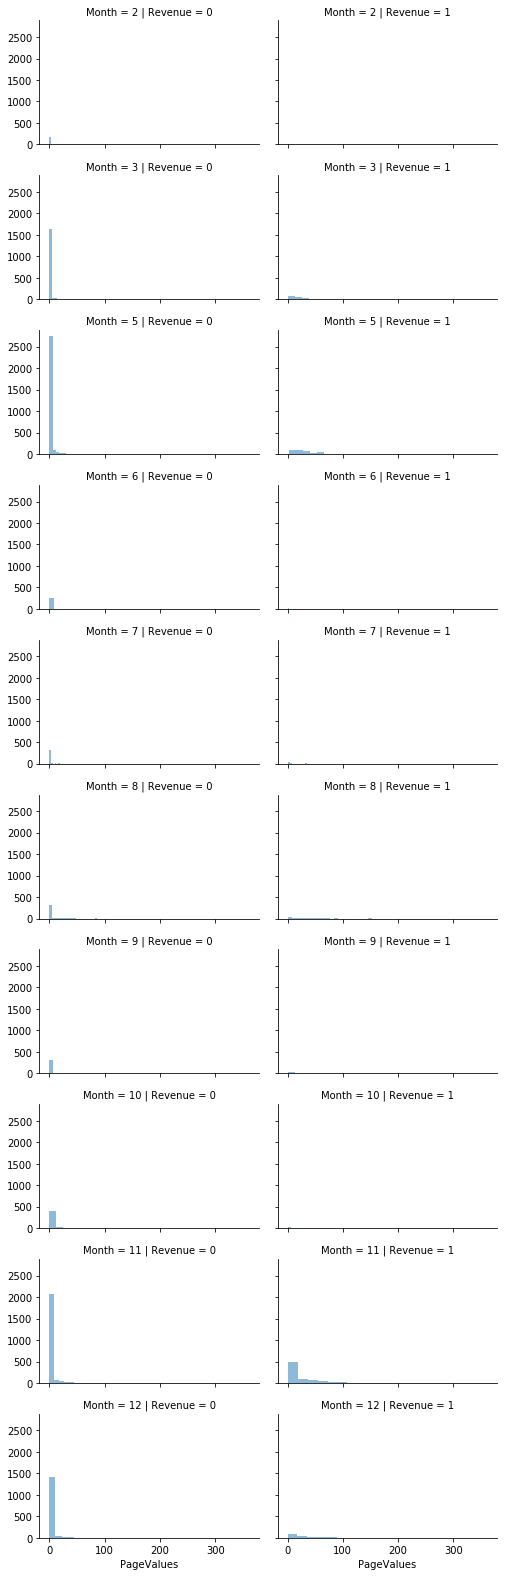

In [17]:
grid = sns.FacetGrid(df, col='Revenue', row='Month', size=2.2, aspect=1.6)
grid.map(plt.hist, 'PageValues', alpha=.5, bins=20)
grid.add_legend();

Seems like most of the successful transcation occur at November. Besides when pagevalues equals to 0, the Revenue has high chance to be 0.

Looks like 'PageValues' and 'ExitRate' have the most to do with Revenue.
In addition, at the upper left corner, attuributes Administrative,	Administrative_Duration, Informational,	Informational_Duration,	ProductRelated,	ProductRelated_Duration are highly correlated to others.


### Check how PageValues and ExitRates highly correlated to Revenue

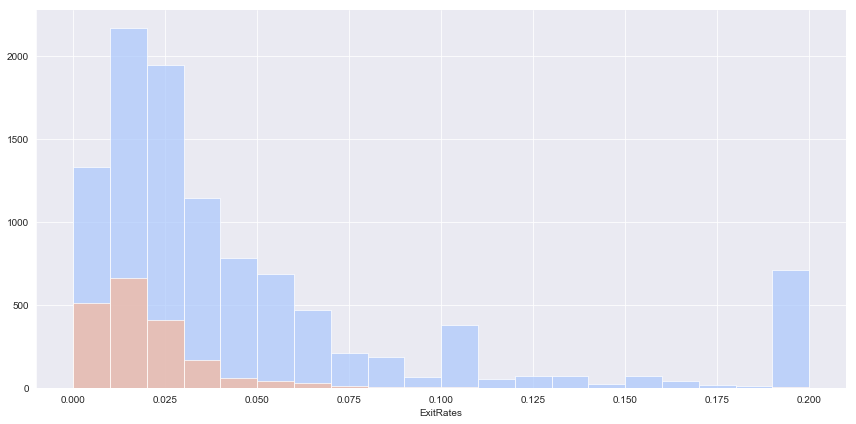

In [18]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Revenue",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'ExitRates',bins=20,alpha=0.7)

There is no revenue when ExitRates exceed 0.075

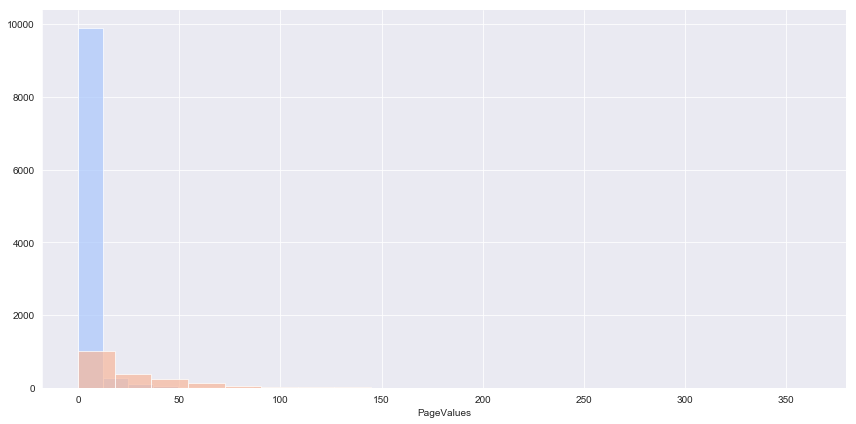

In [19]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Revenue",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'PageValues',bins=20,alpha=0.7)

Most of the values of revenue is 0 when PageValues is also 0.

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


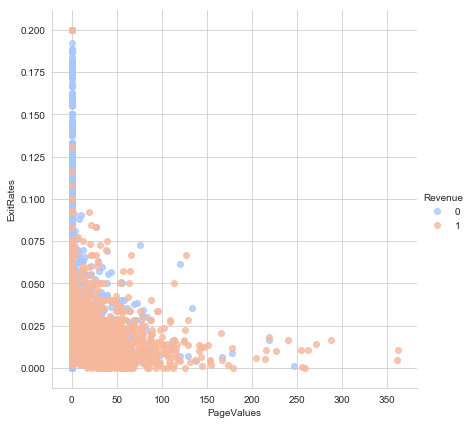

In [20]:
sns.set_style('whitegrid')
sns.lmplot('PageValues','ExitRates',data=df, hue='Revenue',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

The figure shows that the higher the PageValues is, the higher chance that the Revenue is true. In contrast, the higher the ExitRates, the lower probability that Revenue become true.

## Train and improve model step by step

## 1. Logistic regression

In [21]:
data = df

In [22]:
x = data.drop('Revenue', axis = 1)
y = data['Revenue']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

list(x_train)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [24]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [25]:
clf = LogisticRegression(solver = 'liblinear')
clf = clf.fit(x_train, y_train)
probability = clf.predict_proba(x_test)

In [26]:
pred = clf.predict(x_test)
print("accuracy:", clf.score(x_test, y_test))

accuracy: 0.8832116788321168


## 2. Try Decision tree

In [27]:
x = data.drop('Revenue', axis = 1)
y = data['Revenue']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

list(x_train)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

In [30]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(x_train),
                class_names=['not buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("shop.pdf")

True

In [31]:
y_pred = dtree.predict(x_test)
dtree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00788261,
       0.        , 0.0896906 , 0.        , 0.885769  , 0.        ,
       0.01665779, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

#### accuracy

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.884022708840227

## 3. Check heatmap and keep all the features which has large correlation coefficient with revenue 

Text(0.5, 1.0, 'Heatmap for the Features')

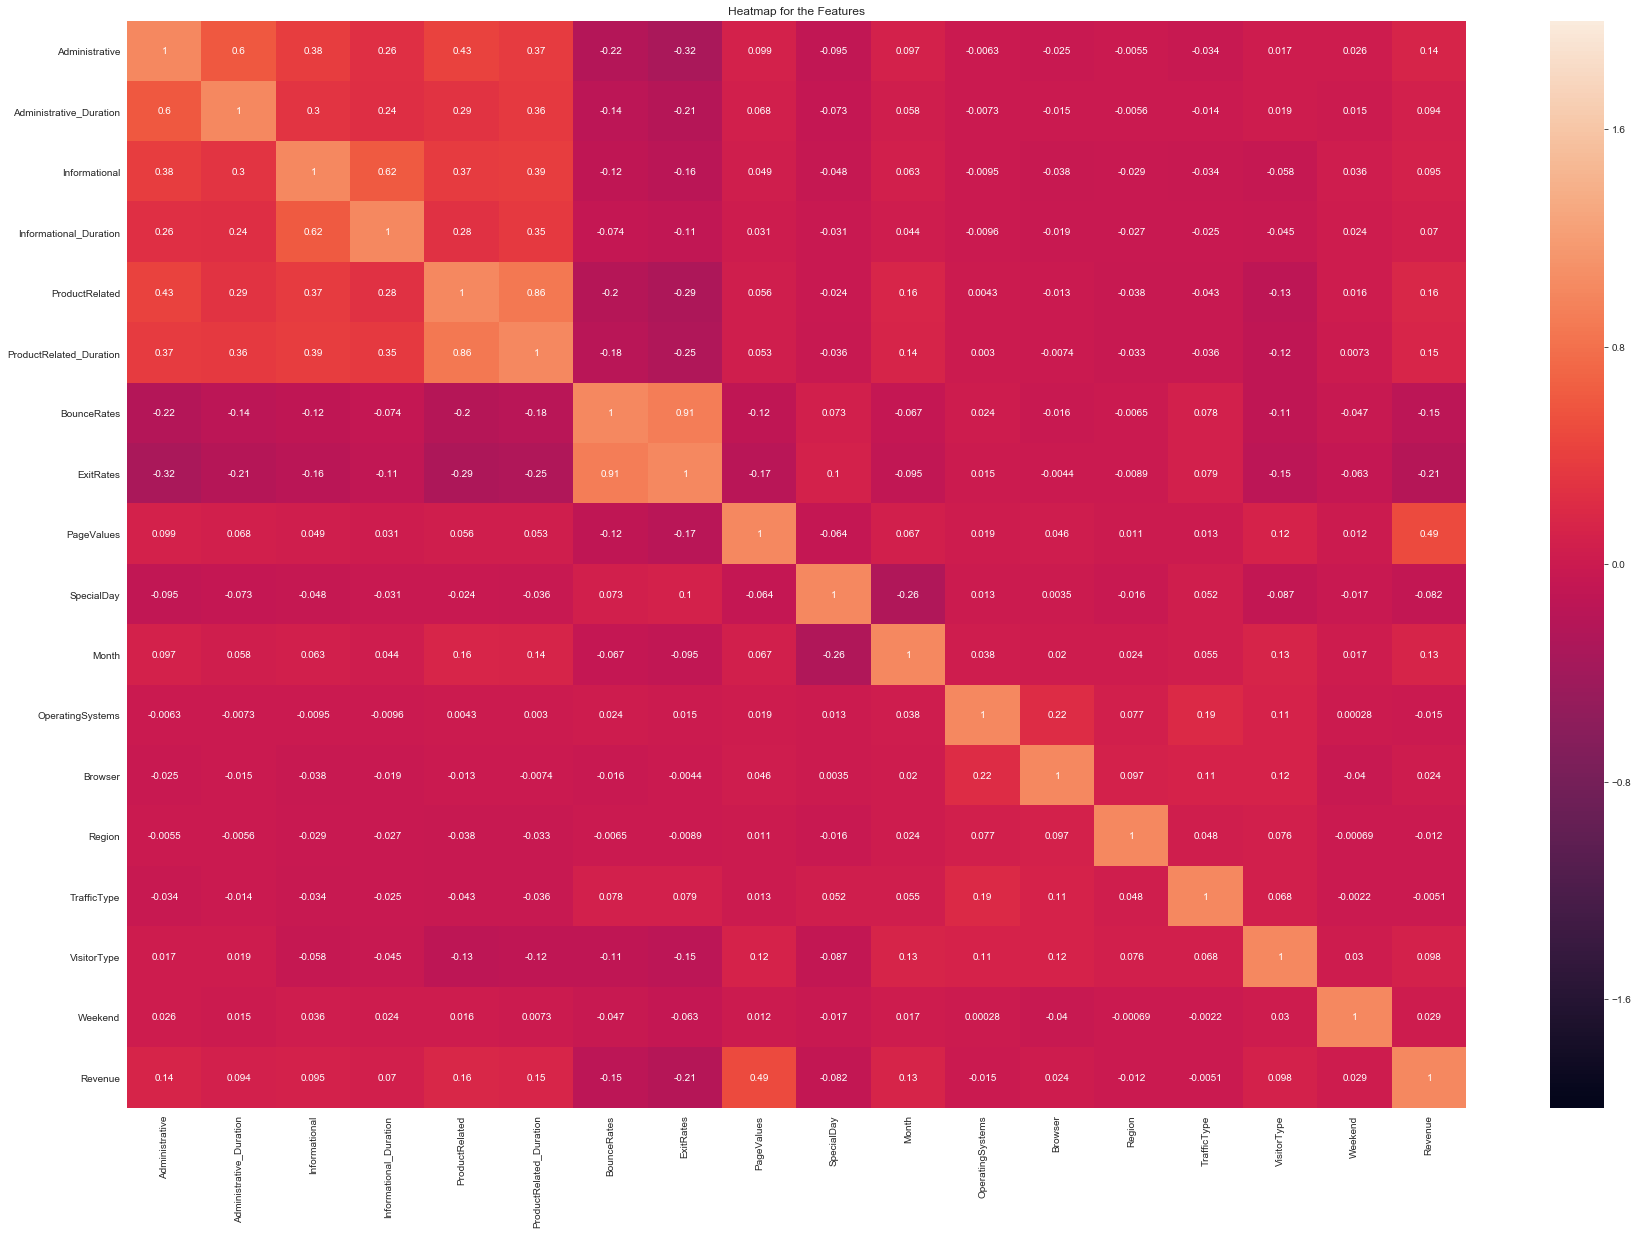

In [33]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df.corr(),vmin=-2,vmax=2,annot=True)

plt.title("Heatmap for the Features")

### Select new features

In [34]:
data = df[['Administrative','ProductRelated','ProductRelated_Duration',\
           'BounceRates','SpecialDay','ExitRates','PageValues','Month','VisitorType','Revenue']]

In [35]:
x = data.drop('Revenue', axis = 1)
y = data['Revenue']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

list(x_train)

['Administrative',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'SpecialDay',
 'ExitRates',
 'PageValues',
 'Month',
 'VisitorType']

### Fit decision tree again

In [36]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(x_train),
                class_names=['not buy','buy'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("shop.pdf")

True

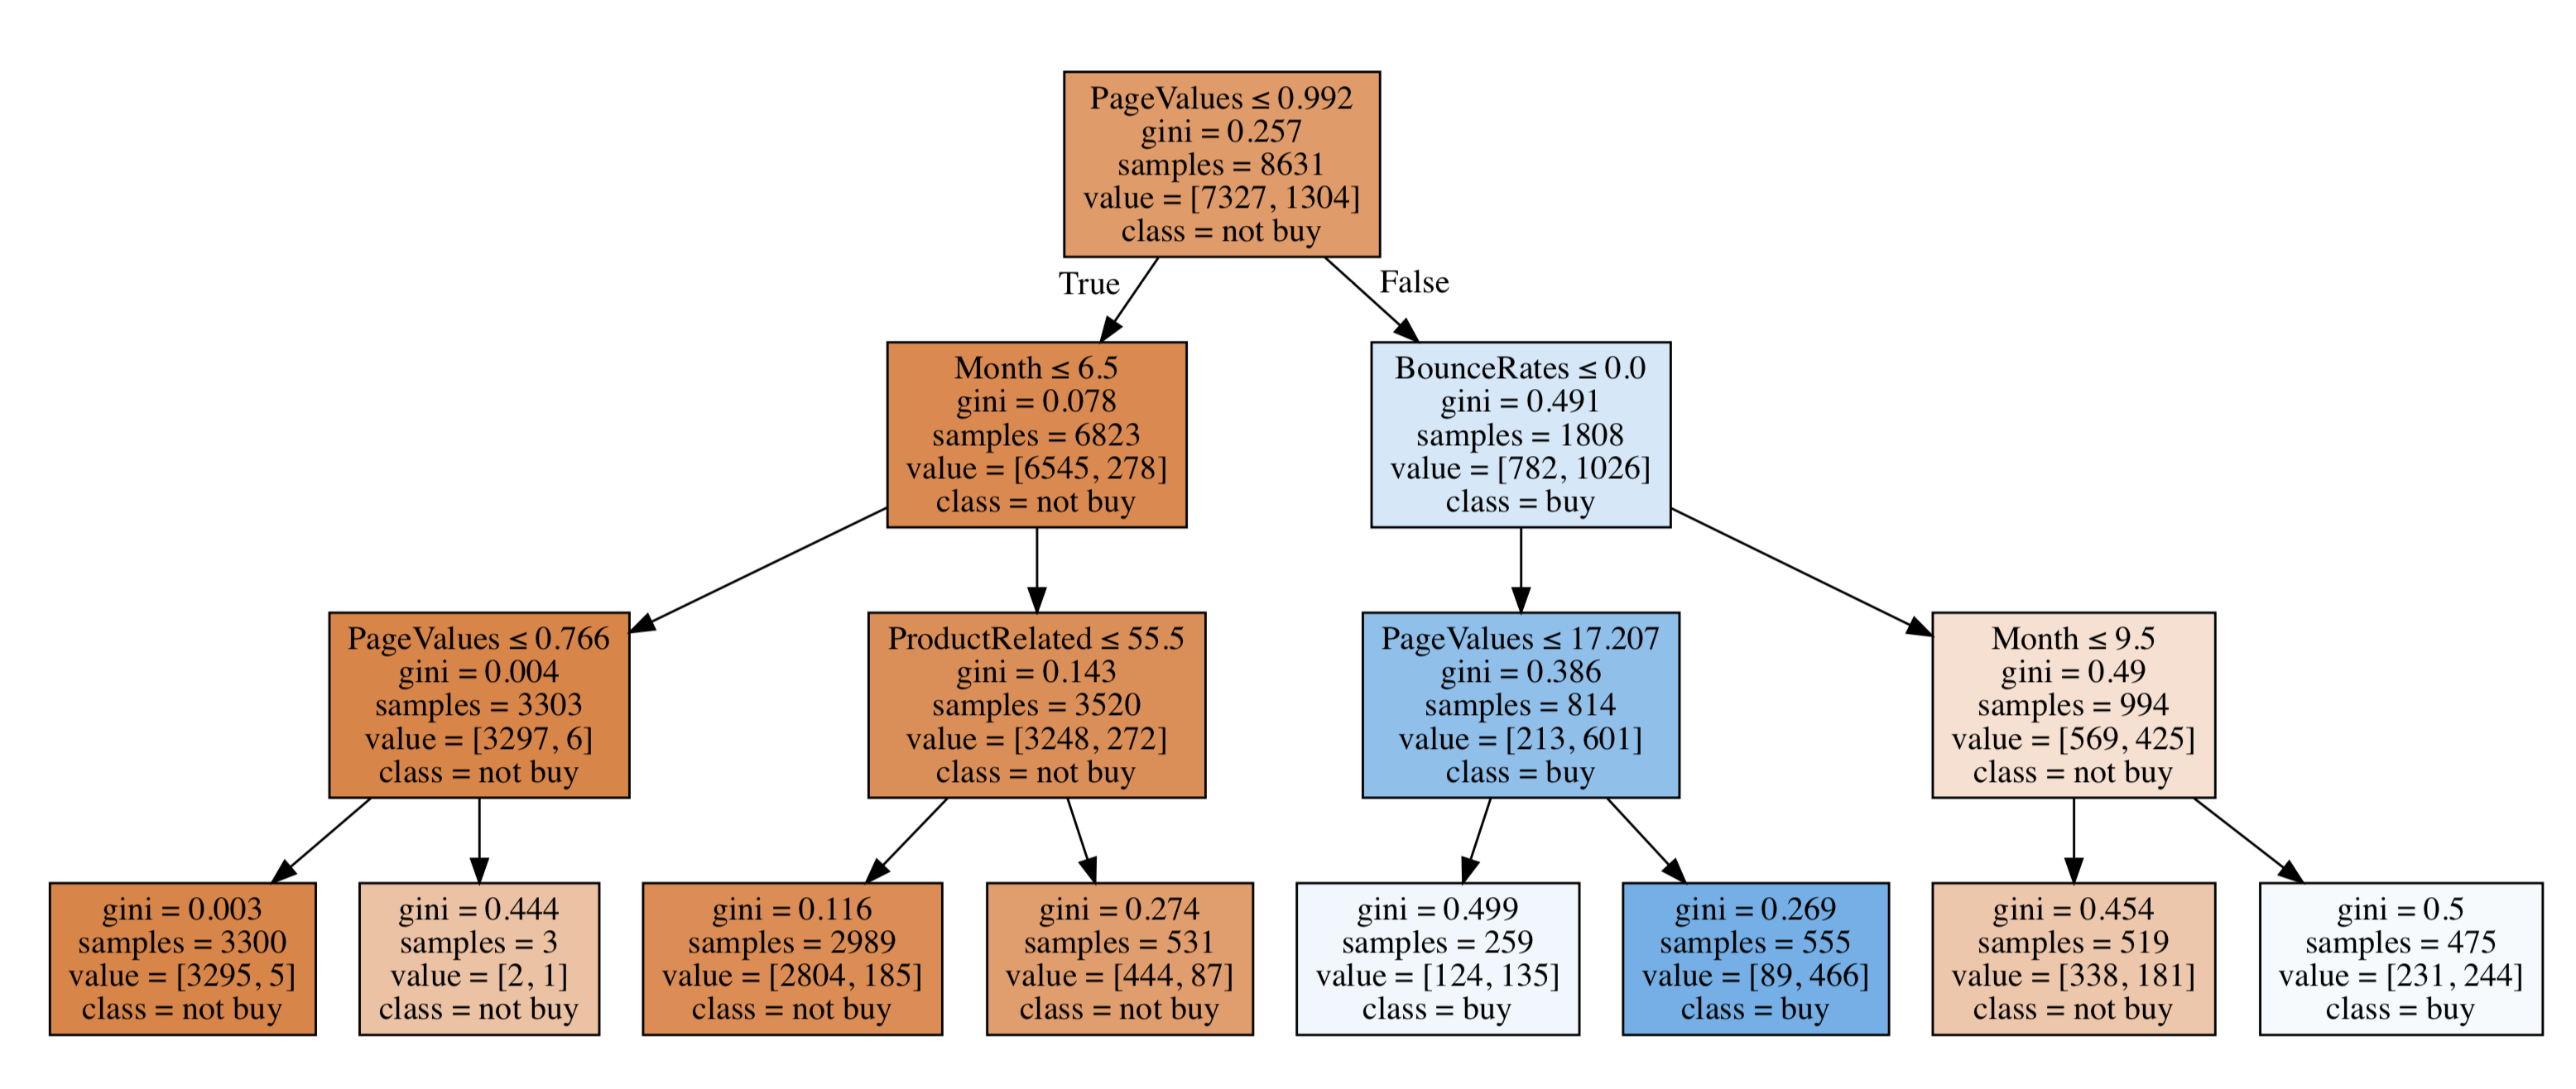

### The accuracy increase!

In [37]:
y_pred = dtree.predict(x_test)
accuracy_score(y_test, y_pred)

0.8891592322249257

## Discussion

According to the graphs above, PageValues have the most to do with Revenue. It may because the formula to calculate pageValues 